In [102]:
import pandas as pd

In [103]:
# conversion with parse dates in read_csv

transactions = pd.read_csv(r"C:\Users\Zana\Desktop\pandas\retail\transactions.csv", parse_dates=["date"])

In [104]:
# conversion with to_datetime
transactions["date"] = pd.to_datetime(transactions["date"])

In [105]:
# conversion with astype

transactions["date"] = transactions["date"].astype("datetime64")

In [106]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [107]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [108]:
# Calcualte the maximum datetime
transactions["date"].max()

Timestamp('2017-08-15 00:00:00')

In [109]:
# Difference between date and max date
transactions["time_to_last_date"] = transactions["date"].max() - transactions["date"]

# Dateparts
transactions["year"] = transactions["date"].dt.year
transactions["month"] = transactions["date"].dt.month
transactions["day_of_week"] = transactions["date"].dt.weekday

# Format Date
transactions["date"] = transactions["date"].dt.strftime("%Y-%B-%d")

transactions.head()

,date,store_nbr,transactions,time_to_last_date,year,month,day_of_week
0,2013-January-01,25,770,1687 days,2013,1,1
1,2013-January-02,1,2111,1686 days,2013,1,2
2,2013-January-02,2,2358,1686 days,2013,1,2
3,2013-January-02,3,3487,1686 days,2013,1,2
4,2013-January-02,4,1922,1686 days,2013,1,2


In [110]:
# overwrite previous transactions df

transactions = pd.read_csv(r"C:\Users\Zana\Desktop\pandas\retail\transactions.csv", parse_dates=["date"])

In [111]:
transactions.tail()

,date,store_nbr,transactions
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932
83487,2017-08-15,54,802


In [112]:
# recreate columns from assignment 1 using assign

transactions = transactions.assign(
    year=transactions["date"].dt.year,
    month=transactions["date"].dt.month,
    day_of_week=transactions["date"].dt.dayofweek,
    time_to_last_date=transactions["date"].max() - transactions["date"],
)

transactions.head()

,date,store_nbr,transactions,year,month,day_of_week,time_to_last_date
0,2013-01-01,25,770,2013,1,1,1687 days
1,2013-01-02,1,2111,2013,1,2,1686 days
2,2013-01-02,2,2358,2013,1,2,1686 days
3,2013-01-02,3,3487,2013,1,2,1686 days
4,2013-01-02,4,1922,2013,1,2,1686 days


In [113]:
# Add three weeks to time to last date column
# Then divide the timedelta (converted to integer) into integer weeks

transactions.assign(
    time_to_last_date=pd.to_timedelta(21, unit="D") + transactions["time_to_last_date"],
    weeks_to_last_date=(lambda x: x["time_to_last_date"].dt.days / 7),
).head()

,date,store_nbr,transactions,year,month,day_of_week,time_to_last_date,weeks_to_last_date
0,2013-01-01,25,770,2013,1,1,1708 days,244.000000
1,2013-01-02,1,2111,2013,1,2,1707 days,243.857143
2,2013-01-02,2,2358,2013,1,2,1707 days,243.857143
3,2013-01-02,3,3487,2013,1,2,1707 days,243.857143
4,2013-01-02,4,1922,2013,1,2,1707 days,243.857143


In [115]:
# Read in oil csv with date as index (and converted to datetime64)
oil = pd.read_csv(r"C:\Users\Zana\Desktop\pandas\retail\oil.csv", 
                  index_col="date", 
                  parse_dates=True)

In [116]:
# This is a synonym for datetime64

oil.index.dtype

dtype('<M8[ns]')

In [117]:
# mean of original series

oil.mean()

dcoilwtico    67.714366
dtype: float64

<AxesSubplot:xlabel='date'>

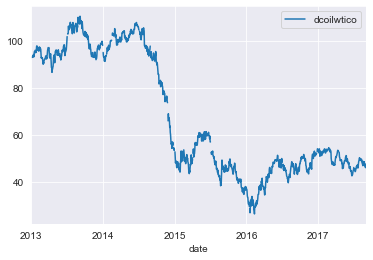

In [118]:
# original plot

oil.plot()

In [119]:
# mean of each type of missing value handling for time series

print(oil.ffill().mean(), 
      oil.bfill().mean(),
      oil.interpolate().mean()
     )

dcoilwtico    67.671249
dtype: float64 dcoilwtico    67.673325
dtype: float64 dcoilwtico    67.661824
dtype: float64


<AxesSubplot:xlabel='date'>

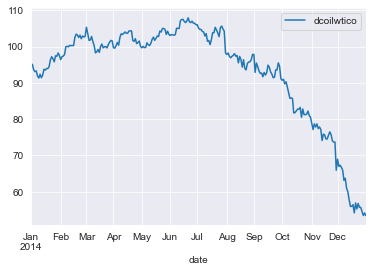

In [120]:
# Filter to 2014 then plot forward filled Series

oil.loc["2014"].ffill().plot()

<AxesSubplot:xlabel='date'>

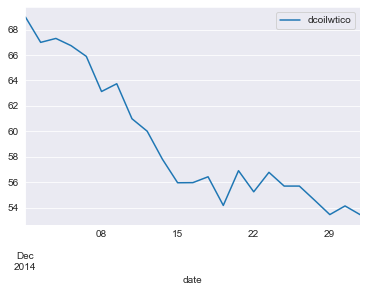

In [121]:
# Filter to December 2014 then plot forward filled Series

oil.loc["2014-12"].ffill().plot()

<AxesSubplot:xlabel='date'>

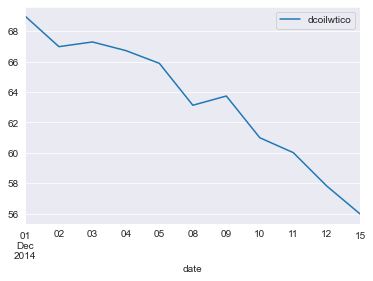

In [122]:
# Filter to first two weeks of December 2014 then plot forward filled Series

oil.loc["2014-12-01":"2014-12-15"].ffill().plot()

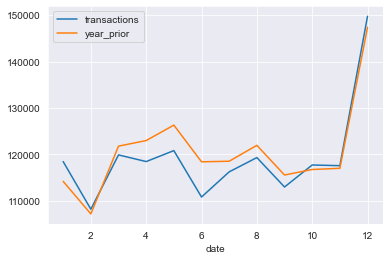

In [123]:
# filter df to store 47, 'drop' store_nbr column via loc
transactions_47 = transactions.loc[transactions["store_nbr"] == 47, ["date", "transactions"]]

# Calculate sum of sales by year and month
transactions_47 = (transactions_47
                   .groupby([transactions["date"].dt.year, transactions["date"].dt.month])
                   .sum())

# Calculate a 'year_prior' column by shiftly monthly sales series forward by 12 rows (months)
transactions_47["year_prior"] = transactions_47["transactions"].shift(12)

# Filter to 2015 and plot
transactions_47.loc[2015].plot();

<AxesSubplot:xlabel='date'>

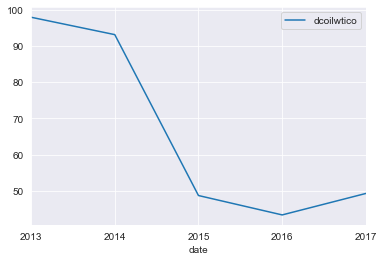

In [124]:
# Monthly average oil price

oil.resample("Y").mean().plot()